**Universidad Tecnologica Nacional - Facultad Buenos Aires** <br>
**Ingenieria Industrial**<br>
**Investigacion Operativa** <br>
**Tema: Cadenas de Markov, caso marketing online <br>**
**Elaborado por: Martin Palazzo** (mpalazzo@frba.utn.edu.ar)<br>
Curso I4051 (Palazzo)<br>

### Importamos las librerias necesarias para trabajar

In [ ]:
# Importamos Numpy para hacer cuentas con vectores, matrices
import numpy as np

In [ ]:
# Importamos Matplotlib para visualizar
import matplotlib.pyplot as plt

In [ ]:
# Importamos Sklearn para generar datos sinteticos y aplicar el algoritmo de segmentacion de clientes
import sklearn
from sklearn.datasets.samples_generator import make_blobs

# importamos seaborn
import seaborn as sns

### Generamos datos sinteticos 
Desde donde se modelará con cadenas de markov la transición de clientes entre distintos segmentos. Para eso creamos un dataset que sea x0 con los estados de los clientes en el mes 0 y otro con los estados de los clientes en el mes 1.

In [ ]:
# Generamos un dataset X0 que tendra 2 variables a considerar y 1000 clientes para el mes 0
x0, y0 = make_blobs(n_samples=5000, centers=5, n_features=2,random_state=10, cluster_std = 2.3, center_box=(10,30))

# Generamos un dataset X1 que tendra 2 variables a considerar y 1000 clientes para el mes 1
x1, y1 = make_blobs(n_samples=5000, centers=5, n_features=2,random_state=10, cluster_std = 3,center_box=(12,29))

Observamos que tamaño y tipo de dato es x0 y x1

In [ ]:
type(x0)

numpy.ndarray

In [ ]:
# con np.shape(.) me fijo las dimensiones del elemento en cuestion.
np.shape(x0)

(5000, 2)

Es una matriz de 1000 renglones y 2 columnas. La primer columna es cantidad de visitas por mes en el sitio y la segunda es cantidad de productos comprados ese mes.

### Segmentamos nuestros clientes y definimos los estados de nuestro modelo
utilizando el algoritmo K-Means, es decir, agrupamos los clientes en funcion de su similaridad. Determinamos que hay 7 estados posibles en que los clientes se pueden encontrar en funcion de la cantidad de visitas al sitio y la cantidad de productos comprados.

In [ ]:
cant_estados = 9

In [ ]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=cant_estados)
cluster.fit(x0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Obtengo el estado de cada cliente en el mes 0 y mes 1 gracias al algoritmo de segmentacion que ejecute en el paso anterior.

In [ ]:
states0 = cluster.labels_
states1 = cluster.predict(x1)

In [ ]:
type(states0)

numpy.ndarray

In [ ]:
# states0 es un vector (array de numpy) de 1000 posiciones
np.shape(states0)

(5000,)

Nuestro modelo entonces tiene 7 estados que son 7 categorias de clientes. En cada mes los clientes cambian de categoria.

### Visualzacion de los clientes 
en funcion de las 2 variables en analisis y su respectiva segmentacion. Con plt (ver que es matplotlib importado como "plt" y la funcion scatter (significa "visualizar puntos") visualizamos las 7 categorias de clientes en funcion de la cantidad de visitas y la cantidad de compras en un mes.

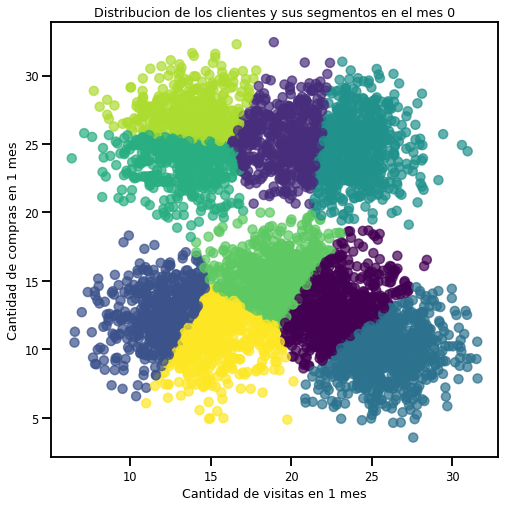

In [ ]:
fig,ax = plt.subplots()
plt.scatter(x0[:,0],x0[:,1], c = states0, alpha = 0.7)
plt.xlabel("Cantidad de visitas en 1 mes")
plt.ylabel("Cantidad de compras en 1 mes")
plt.title("Distribucion de los clientes y sus segmentos en el mes 0")
fig.set_size_inches(8,8)
plt.show()

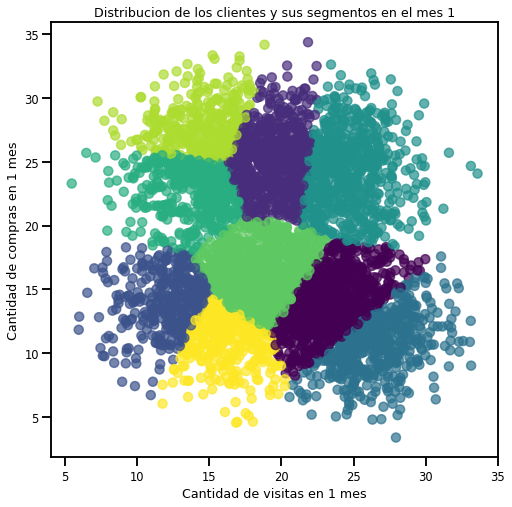

In [ ]:
fig,ax = plt.subplots()
plt.scatter(x1[:,0],x1[:,1], c = states1, alpha = 0.7)
plt.xlabel("Cantidad de visitas en 1 mes")
plt.ylabel("Cantidad de compras en 1 mes")
plt.title("Distribucion de los clientes y sus segmentos en el mes 1")
fig.set_size_inches(8,8)
plt.show()

### Construyo la matriz de transición de 1 paso
Con los datos de los estados de los clientes en el mes 0 y en el mes 1 puedo entonces conseguir la matriz de transición de 1 paso.

In [ ]:
# Genero una matriz de 7x7 llena de zeros con np.zeros(dim0, dim1). Esta sera mi matriz de transicion.
tr = np.zeros((cant_estados,cant_estados))

In [ ]:
tr

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
# con un doble ciclo for completo la matriz de transicion "tr"
for i in range(0,cant_estados):
    for j in range(0,cant_estados):
        # Para el renglon i y columna j me pregunto cuantos clientes estaban en el estado "i" y pasaron al "j" en 1 mes.
        tr[i,j] = (states1[states0 == i] == j).sum()/(states0 == i).sum()

In [ ]:
# averiguo las dimensiones de la matriz "tr"
np.shape(tr)

(9, 9)

In [ ]:
# imprimo la matriz "tr" en pantalla sin visualizacion estetica
tr

array([[0.83603896, 0.        , 0.        , 0.0275974 , 0.06006494,
        0.        , 0.06168831, 0.        , 0.01461039],
       [0.        , 0.87923729, 0.        , 0.        , 0.03389831,
        0.02330508, 0.02542373, 0.03813559, 0.        ],
       [0.        , 0.        , 0.69108911, 0.        , 0.        ,
        0.05940594, 0.16831683, 0.        , 0.08118812],
       [0.33969986, 0.        , 0.        , 0.6521146 , 0.        ,
        0.        , 0.        , 0.        , 0.00818554],
       [0.01421801, 0.02685624, 0.        , 0.        , 0.94312796,
        0.        , 0.01579779, 0.        , 0.        ],
       [0.        , 0.14498934, 0.00852878, 0.        , 0.        ,
        0.80383795, 0.04264392, 0.        , 0.        ],
       [0.01302932, 0.03257329, 0.00325733, 0.        , 0.04071661,
        0.01465798, 0.89576547, 0.        , 0.        ],
       [0.        , 0.24349882, 0.        , 0.        , 0.        ,
        0.00236407, 0.        , 0.75413712, 0.        ],


Visualizo la matriz de transicion de 1 paso de manera mas entendible

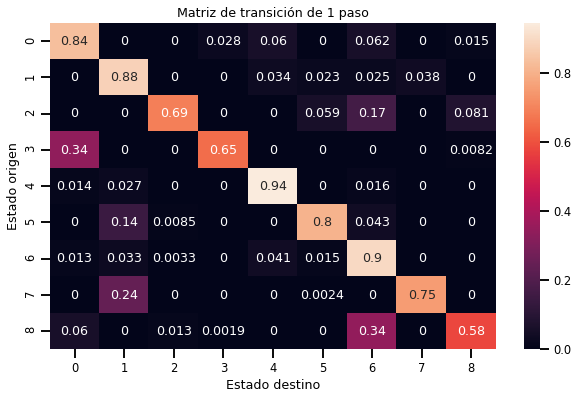

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(tr, annot=True)
sns.set_context("talk", font_scale=0.7)
plt.title("Matriz de transición de 1 paso")
plt.xlabel("Estado destino")
plt.ylabel("Estado origen")
#fig.tight_layout()
plt.show()

### Determino el estado inicial

El vector "estado_0" contiene en cada posición la cantidad de clientes en cada estado en el mes 0

In [ ]:
estado_0 = np.zeros(cant_estados)

In [ ]:
for g in range(0,cant_estados):
    estado_0[g] = (states0 == g).sum() 

Visualizo el vector "estado_0" con un grafico de barras.

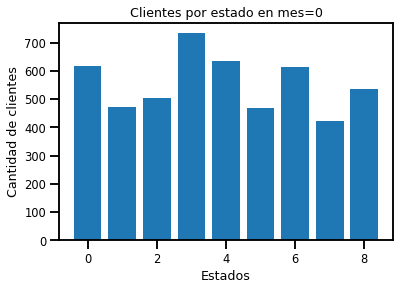

In [ ]:
plt.bar(np.arange(0,cant_estados),estado_0)
plt.title("Clientes por estado en mes=0")
plt.ylabel("Cantidad de clientes")
plt.xlabel("Estados")
plt.show()

### Simulo la cadena de markov

Inicializo el modelo indicando que el vector "estado_0" es el estado inicial.

In [ ]:
# El estado inicial es el calculado en el paso anterior y es un vector que contiene la cantidad de clientes en cada estado.
vec_estado_1 = estado_0

In [ ]:
vec_estado_1

array([616., 472., 505., 733., 633., 469., 614., 423., 535.])

Simulo el sistema 5 meses iniciando con el vector de estado inicial y realizando el producto matricial con la matriz de transición de 1 paso. El resultado sera un nuevo vector que indicara la cantidad de clientes en cada estado en el siguiente paso (mes) hasta 5 pasos (5 meses).

In [ ]:
iteraciones = 10

In [ ]:
valor_estados = np.zeros((cant_estados, iteraciones))

In [ ]:
# transition matrix
for x in range(iteraciones):
    #e0_val, e1_val.....e6_val son vectores asociados a cada estado que les "adjunto" el valor del estado en cada mes
    for f in range(0,cant_estados):
        valor_estados[f,x] = vec_estado_1[f]
    vec_estado_2 = vec_estado_1
    # En cada paso (mes) el vector de estado ira cambiando. En el primer paso el vector "init_state" = "estado_0"
    vec_estado_1 = tr.T.dot(vec_estado_2)
    # luego en los pasos siguientes el vector de estado


Luego de todas las iteraciones, la matriz "valor_estados" contendra los valores de la cantidad de cliente por mes (columna) por estado (renglon).

### Hago un plot de los resultados de la simulacion
Visualizamos la matriz "valor_estados" en funcion de los meses de simulacion. Observamos que luego de cierta cantidad de iteraciones el sistema converge.

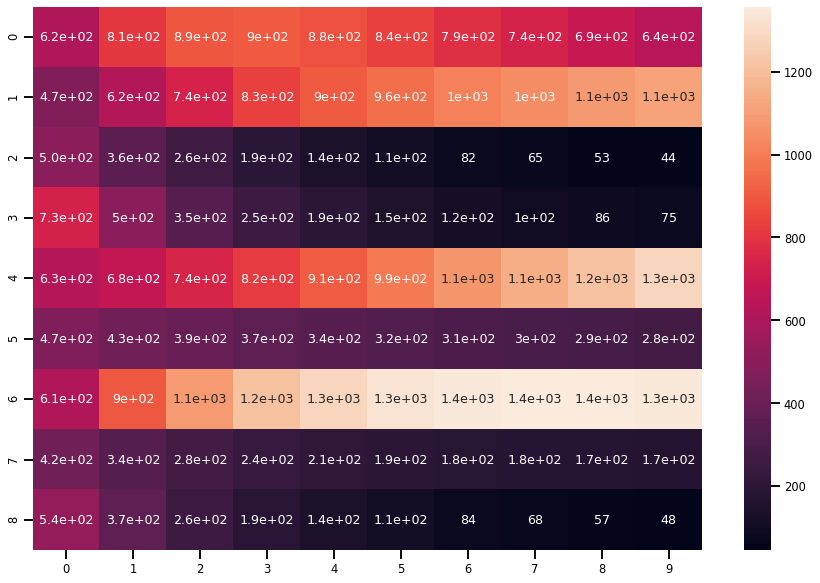

In [ ]:
# imprimimos los vectores de estado para cada mes (en vez de usar probabilidades usamos valores totales de clientes)
plt.figure(figsize=(15,10))
sns.heatmap(valor_estados, annot=True)
ax.set_title("Cantidad de clientes por estado por mes")
ax.set_xlabel("Mes")
ax.set_ylabel("Estado")
#fig.tight_layout()
#fig.set_size_inches(16,10)
plt.show()

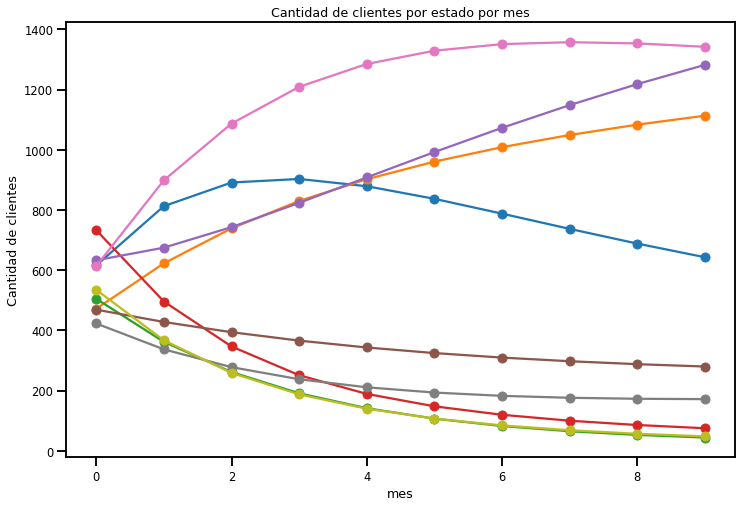

In [ ]:
fig, ax = plt.subplots()
plt.plot(valor_estados.T, '-o')
plt.title("Cantidad de clientes por estado por mes")
plt.xlabel("mes")
plt.ylabel("Cantidad de clientes")
fig.set_size_inches(12,8)
plt.show()